In [9]:
import numpy as np
import matplotlib.pyplot as plt

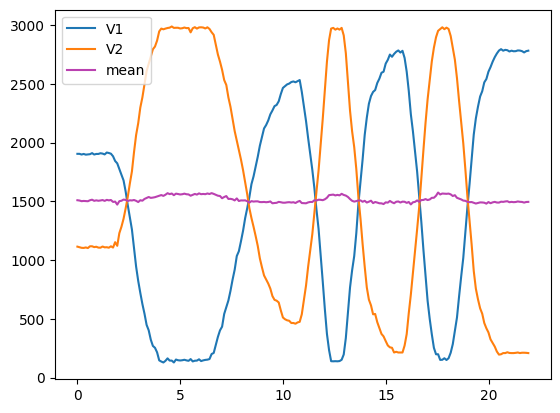

In [10]:
data = np.loadtxt("data_dump.csv", delimiter=",", skiprows=1)
plt.figure()
time = data[:,0]-data[0,0]
val_0 = data[0,1]/4095*360
V1, V2 = data[0,2]/4095*2.600 , data[0,3]/4095*2.600
# plt.plot(time, data[:,1]/4095*360-val_0)
plt.plot(time, data[:,2], label="V1")
plt.plot(time, data[:,3], label="V2")
plt.plot(time, (data[:,2]+data[:,3])*0.5, label="mean", color="#ba41b0")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

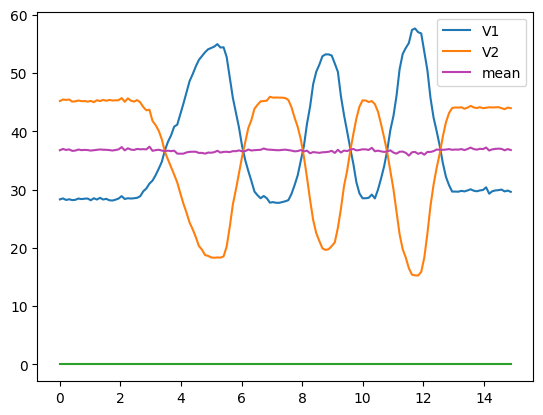

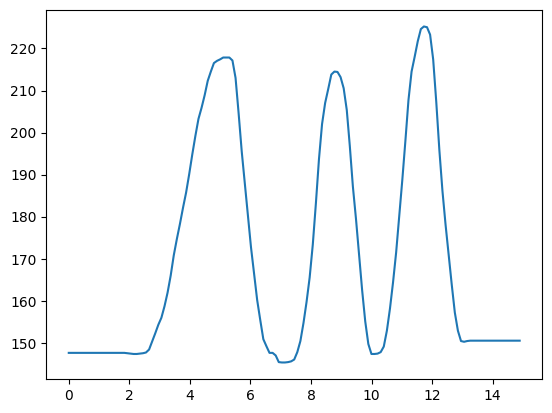

In [14]:
data = np.loadtxt("data_dump.csv", delimiter=",", skiprows=1)
plt.figure()
time = data[:,0]-data[0,0]
val_0 = data[0,1]/4095*360
V1, V2 = data[:,2]/4095*100 , data[:,3]/4095*100
Vmean = (V1 + V2) * 0.5
if np.any(np.abs(Vmean[0]-Vmean)>1):
    print ("Error")
# plt.plot(time, data[:,1]/4095*360-val_0)
plt.figure()
plt.plot(time, V1, label="V1")
plt.plot(time, V2, label="V2")
plt.plot(time, 10*(np.abs(Vmean[0]-Vmean)>1 ))
plt.plot(time, Vmean, label="mean", color="#ba41b0")
plt.legend()
plt.show()
plt.figure()
angle = data[:,1]/4095*360
plt.plot(time, angle)
plt.show()

Initial angle: 147.6043956043956
2.6467943380516243


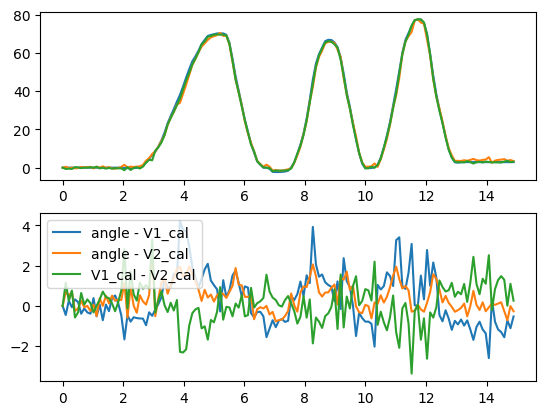

In [16]:
plt.figure()
plt.subplot(2,1,1)
angle = data[:,1]/4095*360
print(f"Initial angle: {angle[0]}")
angle = angle - angle[0]
maxabs1 = np.max(np.abs(angle))
V1_cal = V1-V1[0]
maxabs2 = np.max(np.abs(V1_cal))
V2_cal = -(V2-V2[0])
maxabs3 = np.max(np.abs(V2_cal))
print(maxabs1 / maxabs2)
V1_cal = V1_cal * maxabs1 / maxabs2
V2_cal = V2_cal * maxabs1 / maxabs3
plt.plot(time, angle)
plt.plot(time, V1_cal)
plt.plot(time, V2_cal)

plt.subplot(2,1,2)
diff1 = angle - V1_cal
diff2 = angle - V2_cal
diff3 = V1_cal - V2_cal
plt.plot(time, diff1, label="angle - V1_cal")
plt.plot(time, diff2, label="angle - V2_cal")
plt.plot(time, diff3, label="V1_cal - V2_cal")
plt.legend()
plt.show()